# FIFA Case Study

In [1]:
# import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import FIFA top 20 players dataset

In [4]:
fifa = pd.read_csv('players_20.csv')

#### Check first 5 records

In [8]:
fifa.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


#### Extract all the columns in the fifa dataset 

In [10]:
fifa.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [41]:
# Get all the names
for col in fifa.columns:
    print(col)

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defe

#### Shape of the dataset

In [11]:
fifa.shape

(18278, 104)

### Get records based on nationality

In [12]:
fifa['nationality'].value_counts()

nationality
England                1667
Germany                1216
Spain                  1035
France                  984
Argentina               886
                       ... 
Liberia                   1
São Tomé & Príncipe       1
Puerto Rico               1
Bahrain                   1
Indonesia                 1
Name: count, Length: 162, dtype: int64

#### Get top 5 countries

In [13]:
fifa['nationality'].value_counts()[0:5]

nationality
England      1667
Germany      1216
Spain        1035
France        984
Argentina     886
Name: count, dtype: int64

### Create a bar graph in matplotlib and countplot in seaborn

#### Bar Graph in matplotlib

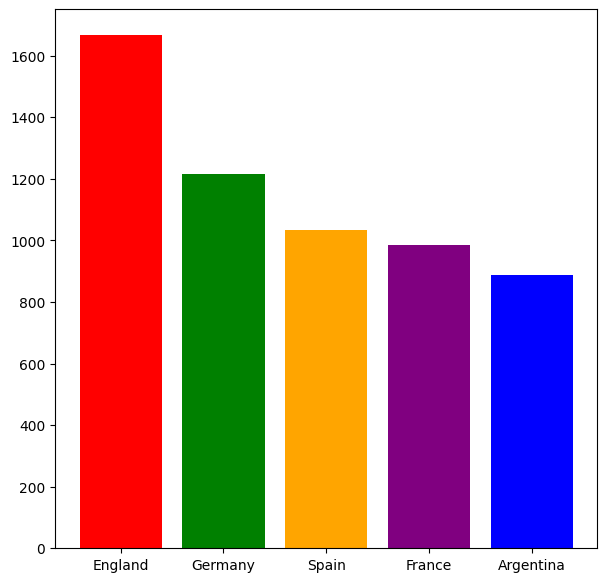

In [17]:
plt.figure(figsize=(7,7))
plt.bar(list(fifa['nationality'].value_counts().keys()[0:5]), list(fifa['nationality'].value_counts()[0:5]), color=['Red','Green','Orange','Purple','Blue'])
plt.show()

#### Count plot in seaborn

In [37]:
selected_countries = list(fifa['nationality'].value_counts().keys()[0:5]) # extract top 5 nations

In [38]:
selected_countries_df = fifa[fifa['nationality'].isin(selected_countries)]

<Axes: xlabel='nationality', ylabel='count'>

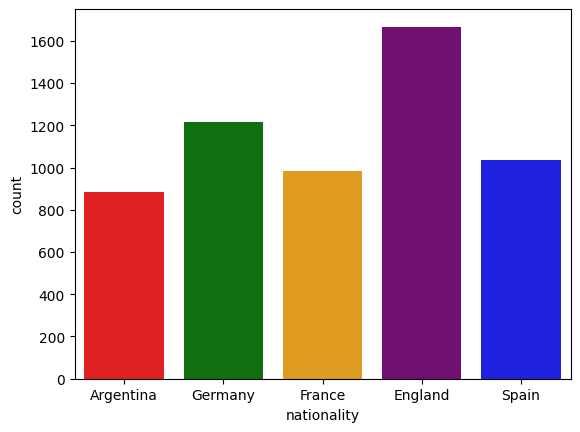

In [39]:
sns.countplot(data=selected_countries_df, x='nationality',hue='nationality' , palette=['Red','Green','Orange','Purple','Blue'])

#### Get player name(short name) and salary of players(in eur)

In [43]:
players_salary = fifa[['short_name','wage_eur']]

In [44]:
players_salary.head()

,short_name,wage_eur
0,L. Messi,565000
1,Cristiano Ronaldo,405000
2,Neymar Jr,290000
3,J. Oblak,125000
4,E. Hazard,470000


In [45]:
# Salary of players with top first
players_salary.sort_values(by='wage_eur', ascending=False)

,short_name,wage_eur
0,L. Messi,565000
4,E. Hazard,470000
1,Cristiano Ronaldo,405000
5,K. De Bruyne,370000
22,A. Griezmann,370000
...,...,...
565,J. Serendero,0
1868,M. Mevlja,0
14723,R. Fernández,0
16356,H. Ivanov,0


In [46]:
# Get top 5 players with maximum salary
players_salary.sort_values(by='wage_eur',ascending=False).head()

,short_name,wage_eur
0,L. Messi,565000
4,E. Hazard,470000
1,Cristiano Ronaldo,405000
5,K. De Bruyne,370000
22,A. Griezmann,370000


#### Create a Bar graph of top 5 players with highest salary in Eur

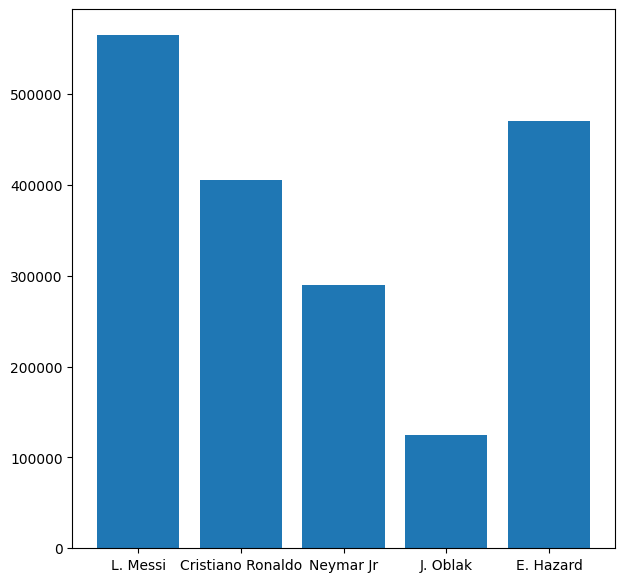

In [47]:
plt.figure(figsize=(7,7))
plt.bar(list(players_salary['short_name'][0:5]), list(players_salary['wage_eur'][0:5]))
plt.show()

### Get all the German player, nationality == Germany

In [49]:
Germany = fifa[fifa['nationality'] == 'Germany']

In [50]:
Germany.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,33,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,182521,https://sofifa.com/player/182521/toni-kroos/20...,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,...,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
37,188350,https://sofifa.com/player/188350/marco-reus/20...,M. Reus,Marco Reus,30,1989-05-31,180,71,Germany,Borussia Dortmund,...,69+3,65+3,65+3,65+3,69+3,64+3,55+3,55+3,55+3,64+3
49,178603,https://sofifa.com/player/178603/mats-hummels/...,M. Hummels,Mats Hummels,30,1988-12-16,191,94,Germany,Borussia Dortmund,...,77+3,83+3,83+3,83+3,77+3,78+3,84+3,84+3,84+3,78+3


#### Get top 5 tallest German players

In [51]:
Germany.sort_values(by='height_cm', ascending=False).head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
8016,236831,https://sofifa.com/player/236831/aaron-seydel/...,A. Seydel,Aaron Seydel,23,1996-02-07,199,90,Germany,1. FSV Mainz 05,...,46+2,43+2,43+2,43+2,46+2,44+2,43+2,43+2,43+2,44+2
1217,200212,https://sofifa.com/player/200212/michael-esser...,M. Esser,Michael Esser,31,1987-11-22,198,97,Germany,Hannover 96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1389,199833,https://sofifa.com/player/199833/lars-unnersta...,L. Unnerstall,Lars Unnerstall,28,1990-07-20,198,103,Germany,PSV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11859,167437,https://sofifa.com/player/167437/dominik-stroh...,D. Stroh-Engel,Dominik Stroh-Engel,33,1985-11-27,197,94,Germany,SpVgg Unterhaching,...,39+2,45+2,45+2,45+2,39+2,39+2,47+2,47+2,47+2,39+2
13576,239746,https://sofifa.com/player/239746/lukas-watkowi...,L. Watkowiak,Lukas Watkowiak,23,1996-03-06,197,103,Germany,SV Wehen Wiesbaden,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Top 5 German Heavy players

In [52]:
Germany.sort_values(by='weight_kg', ascending=False).head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
13576,239746,https://sofifa.com/player/239746/lukas-watkowi...,L. Watkowiak,Lukas Watkowiak,23,1996-03-06,197,103,Germany,SV Wehen Wiesbaden,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1389,199833,https://sofifa.com/player/199833/lars-unnersta...,L. Unnerstall,Lars Unnerstall,28,1990-07-20,198,103,Germany,PSV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518,179783,https://sofifa.com/player/179783/ralf-fahrmann...,R. Fährmann,Ralf Fährmann,30,1988-09-27,197,98,Germany,Norwich City,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1217,200212,https://sofifa.com/player/200212/michael-esser...,M. Esser,Michael Esser,31,1987-11-22,198,97,Germany,Hannover 96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,212190,https://sofifa.com/player/212190/niklas-sule/2...,N. Süle,Niklas Süle,23,1995-09-03,195,97,Germany,FC Bayern München,...,71+2,77+2,77+2,77+2,71+2,75+2,83+2,83+2,83+2,75+2


#### Get top 5 German players with heighest salary in Eur

In [53]:
Germany.sort_values(by='wage_eur', ascending=False).head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
36,182521,https://sofifa.com/player/182521/toni-kroos/20...,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,...,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,222492,https://sofifa.com/player/222492/leroy-sane/20...,L. Sané,Leroy Sané,23,1996-01-11,183,75,Germany,Manchester City,...,65+2,59+2,59+2,59+2,65+2,61+2,52+2,52+2,52+2,61+2
146,186942,https://sofifa.com/player/186942/ilkay-gundoga...,I. Gündoğan,İlkay Gündoğan,28,1990-10-24,180,80,Germany,Manchester City,...,76+3,79+3,79+3,79+3,76+3,74+3,72+3,72+3,72+3,74+3
70,189596,https://sofifa.com/player/189596/thomas-muller...,T. Müller,Thomas Müller,29,1989-09-13,186,75,Germany,FC Bayern München,...,69+3,68+3,68+3,68+3,69+3,67+3,62+3,62+3,62+3,67+3


In [56]:
# Too many columns, get only required columns
Germany[['short_name', 'wage_eur']].sort_values(by='wage_eur', ascending=False).head()

,short_name,wage_eur
36,T. Kroos,330000
6,M. ter Stegen,250000
55,L. Sané,195000
146,I. Gündoğan,180000
70,T. Müller,170000


### Explore Shooting skill data

In [57]:
players_shooting = fifa[['short_name', 'shooting']]

In [58]:
players_shooting.head()

,short_name,shooting
0,L. Messi,92.0
1,Cristiano Ronaldo,93.0
2,Neymar Jr,85.0
3,J. Oblak,NaN
4,E. Hazard,83.0


### Explore defending skills

In [60]:
players_defending = fifa[['short_name', 'defending','nationality','club']]
players_defending.head()

,short_name,defending,nationality,club
0,L. Messi,39.0,Argentina,FC Barcelona
1,Cristiano Ronaldo,35.0,Portugal,Juventus
2,Neymar Jr,32.0,Brazil,Paris Saint-Germain
3,J. Oblak,NaN,Slovenia,Atlético Madrid
4,E. Hazard,35.0,Belgium,Real Madrid


### Get top 5 defending players

In [61]:
players_defending.sort_values(by='defending', ascending=False).head()

,short_name,defending,nationality,club
16,G. Chiellini,90.0,Italy,Juventus
7,V. van Dijk,90.0,Netherlands,Liverpool
11,K. Koulibaly,89.0,Senegal,Napoli
35,D. Godín,89.0,Uruguay,Inter
49,M. Hummels,89.0,Germany,Borussia Dortmund


#### Get players from Real Madrid club

In [63]:
real_madrid = fifa[fifa['club'] == 'Real Madrid']
real_madrid.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
8,177003,https://sofifa.com/player/177003/luka-modric/2...,L. Modrić,Luka Modrić,33,1985-09-09,172,66,Croatia,Real Madrid,...,81+3,81+3,81+3,81+3,81+3,79+3,72+3,72+3,72+3,79+3
18,155862,https://sofifa.com/player/155862/sergio-ramos-...,Sergio Ramos,Sergio Ramos García,33,1986-03-30,184,82,Spain,Real Madrid,...,80+3,84+3,84+3,84+3,80+3,82+3,87+3,87+3,87+3,82+3
28,192119,https://sofifa.com/player/192119/thibaut-court...,T. Courtois,Thibaut Courtois,27,1992-05-11,199,96,Belgium,Real Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,182521,https://sofifa.com/player/182521/toni-kroos/20...,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,...,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3


#### Top 5 earners in Real Madrid club

In [64]:
real_madrid.sort_values(by='wage_eur', ascending=False).head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
8,177003,https://sofifa.com/player/177003/luka-modric/2...,L. Modrić,Luka Modrić,33,1985-09-09,172,66,Croatia,Real Madrid,...,81+3,81+3,81+3,81+3,81+3,79+3,72+3,72+3,72+3,79+3
36,182521,https://sofifa.com/player/182521/toni-kroos/20...,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,...,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
18,155862,https://sofifa.com/player/155862/sergio-ramos-...,Sergio Ramos,Sergio Ramos García,33,1986-03-30,184,82,Spain,Real Madrid,...,80+3,84+3,84+3,84+3,80+3,82+3,87+3,87+3,87+3,82+3
46,165153,https://sofifa.com/player/165153/karim-benzema...,K. Benzema,Karim Benzema,31,1987-12-19,185,81,France,Real Madrid,...,62+3,62+3,62+3,62+3,62+3,58+3,54+3,54+3,54+3,58+3


In [65]:
# get specific columns
real_madrid[['short_name', 'wage_eur']].sort_values(by='wage_eur', ascending=False).head()

,short_name,wage_eur
4,E. Hazard,470000
8,L. Modrić,340000
36,T. Kroos,330000
18,Sergio Ramos,300000
46,K. Benzema,285000


In [66]:
# Top best shooting skill players in Real Madrid
real_madrid[['short_name', 'shooting']].sort_values(by='shooting', ascending=False).head()

,short_name,shooting
100,G. Bale,87.0
106,J. Rodríguez,86.0
4,E. Hazard,83.0
46,K. Benzema,82.0
161,L. Jović,82.0


In [67]:
# Top defending players in Real Madrid club
real_madrid[['short_name', 'defending']].sort_values(by='defending',ascending=False).head()

,short_name,defending
18,Sergio Ramos,87.0
42,Casemiro,85.0
76,R. Varane,85.0
94,Carvajal,82.0
332,Éder Militão,81.0


In [ ]:
# Nation wise players in Real Madrid 